## Установка PySpark

In [ ]:
!apt-get update

Hit:1 http://security.ubuntu.com/ubuntu focal-security InRelease
Hit:2 https://cloud.r-project.org/bin/linux/ubuntu focal-cran40/ InRelease
Hit:3 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2004/x86_64  InRelease
Hit:4 http://archive.ubuntu.com/ubuntu focal InRelease
Hit:5 http://archive.ubuntu.com/ubuntu focal-updates InRelease
Hit:6 http://archive.ubuntu.com/ubuntu focal-backports InRelease
Hit:7 http://ppa.launchpad.net/c2d4u.team/c2d4u4.0+/ubuntu focal InRelease
Hit:8 http://ppa.launchpad.net/cran/libgit2/ubuntu focal InRelease
Hit:9 http://ppa.launchpad.net/deadsnakes/ppa/ubuntu focal InRelease
Hit:10 http://ppa.launchpad.net/graphics-drivers/ppa/ubuntu focal InRelease
Hit:11 http://ppa.launchpad.net/ubuntugis/ppa/ubuntu focal InRelease
Reading package lists... Done


In [ ]:
!apt-get install openjdk-8-jdk-headless -qq > /dev/null

In [ ]:
!wget -q https://downloads.apache.org/spark/spark-3.2.3/spark-3.2.3-bin-hadoop2.7.tgz

In [ ]:
!tar -xvf spark-3.2.3-bin-hadoop2.7.tgz

spark-3.2.3-bin-hadoop2.7/
spark-3.2.3-bin-hadoop2.7/LICENSE
spark-3.2.3-bin-hadoop2.7/NOTICE
spark-3.2.3-bin-hadoop2.7/R/
spark-3.2.3-bin-hadoop2.7/R/lib/
spark-3.2.3-bin-hadoop2.7/R/lib/SparkR/
spark-3.2.3-bin-hadoop2.7/R/lib/SparkR/DESCRIPTION
spark-3.2.3-bin-hadoop2.7/R/lib/SparkR/INDEX
spark-3.2.3-bin-hadoop2.7/R/lib/SparkR/Meta/
spark-3.2.3-bin-hadoop2.7/R/lib/SparkR/Meta/Rd.rds
spark-3.2.3-bin-hadoop2.7/R/lib/SparkR/Meta/features.rds
spark-3.2.3-bin-hadoop2.7/R/lib/SparkR/Meta/hsearch.rds
spark-3.2.3-bin-hadoop2.7/R/lib/SparkR/Meta/links.rds
spark-3.2.3-bin-hadoop2.7/R/lib/SparkR/Meta/nsInfo.rds
spark-3.2.3-bin-hadoop2.7/R/lib/SparkR/Meta/package.rds
spark-3.2.3-bin-hadoop2.7/R/lib/SparkR/NAMESPACE
spark-3.2.3-bin-hadoop2.7/R/lib/SparkR/R/
spark-3.2.3-bin-hadoop2.7/R/lib/SparkR/R/SparkR
spark-3.2.3-bin-hadoop2.7/R/lib/SparkR/R/SparkR.rdb
spark-3.2.3-bin-hadoop2.7/R/lib/SparkR/R/SparkR.rdx
spark-3.2.3-bin-hadoop2.7/R/lib/SparkR/help/
spark-3.2.3-bin-hadoop2.7/R/lib/SparkR/help/An

In [ ]:
!pip install -q findspark

In [ ]:
import os
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"
os.environ["SPARK_HOME"] = "/content/spark-3.2.3-bin-hadoop2.7"

In [ ]:
import findspark
findspark.init()
from pyspark.sql import SparkSession

spark = SparkSession.builder.master("local[*]").getOrCreate()

## Загрузите данные при помощи spark.read.csv из приложенного файла

In [ ]:
df = spark.read.csv('iris.CSV', inferSchema=True, header=True)

In [ ]:
df.show(5)

+------------+-----------+------------+-----------+-------+-----------+
|sepal_length|sepal_width|petal_length|petal_width|variety|variety_num|
+------------+-----------+------------+-----------+-------+-----------+
|         5.1|        3.5|         1.4|        0.2| Setosa|          0|
|         4.9|        3.0|         1.4|        0.2| Setosa|          0|
|         4.7|        3.2|         1.3|        0.2| Setosa|          0|
|         4.6|        3.1|         1.5|        0.2| Setosa|          0|
|         5.0|        3.6|         1.4|        0.2| Setosa|          0|
+------------+-----------+------------+-----------+-------+-----------+
only showing top 5 rows



## Воспользуйтесь командами groupBy, max, min и avg, чтобы вывести максимальное минимальное и среднее значние каждого из аттрбутов цветка ('sepal_length','sepal_width','petal_length','petal_width')

In [ ]:
df_lim = df.select('variety', 'sepal_length', 'sepal_width', 'petal_length', 'petal_width')
df_lim.take(1)

[Row(variety='Setosa', sepal_length=5.1, sepal_width=3.5, petal_length=1.4, petal_width=0.2)]

In [ ]:
df_lim.write.format('com.databricks.spark.csv').option('header', 'true').save('df_lim.csv')   ## Сохранение

In [ ]:
df_lim_max = df_lim.groupBy('variety').max('sepal_length', 'sepal_width', 'petal_length', 'petal_width')
df_lim_max.show()

+----------+-----------------+----------------+-----------------+----------------+
|   variety|max(sepal_length)|max(sepal_width)|max(petal_length)|max(petal_width)|
+----------+-----------------+----------------+-----------------+----------------+
| Virginica|              7.9|             3.8|              6.9|             2.5|
|    Setosa|              5.8|             4.4|              1.9|             0.6|
|Versicolor|              7.0|             3.4|              5.1|             1.8|
+----------+-----------------+----------------+-----------------+----------------+



In [ ]:
df_lim_min = df_lim.groupBy('variety').min('sepal_length', 'sepal_width', 'petal_length', 'petal_width')
df_lim_min.show()

+----------+-----------------+----------------+-----------------+----------------+
|   variety|min(sepal_length)|min(sepal_width)|min(petal_length)|min(petal_width)|
+----------+-----------------+----------------+-----------------+----------------+
| Virginica|              4.9|             2.2|              4.5|             1.4|
|    Setosa|              4.3|             2.3|              1.0|             0.1|
|Versicolor|              4.9|             2.0|              3.0|             1.0|
+----------+-----------------+----------------+-----------------+----------------+



In [ ]:
df_lim_avg = df_lim.groupBy('variety').avg('sepal_length', 'sepal_width', 'petal_length', 'petal_width')
df_lim_avg.show()

+----------+-----------------+------------------+------------------+------------------+
|   variety|avg(sepal_length)|  avg(sepal_width)| avg(petal_length)|  avg(petal_width)|
+----------+-----------------+------------------+------------------+------------------+
| Virginica|6.587999999999998|2.9739999999999998|             5.552|             2.026|
|    Setosa|5.005999999999999| 3.428000000000001|1.4620000000000002|0.2459999999999999|
|Versicolor|            5.936|2.7700000000000005|              4.26|1.3259999999999998|
+----------+-----------------+------------------+------------------+------------------+



In [ ]:
import matplotlib.pyplot as plt

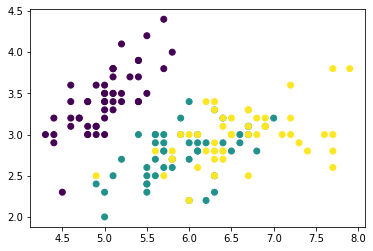

In [ ]:
plt.scatter(df[['sepal_length']].collect(), df[['sepal_width']].collect(), c=df[['variety_num']].collect())

## Выведите по аналогии график petal_length и petal_width, так же раскрашенный по типам цветков

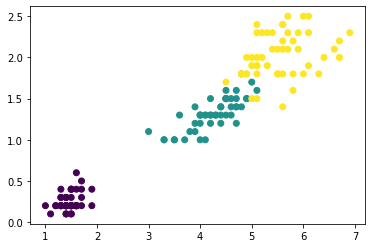

In [ ]:
plt.scatter(df[['petal_length']].collect(), df[['petal_width']].collect(), c=df[['variety_num']].collect())

## Посмотрите внимательно на получившийся график и сформируйте правило вида ЕСЛИ ЗНАЧЕНИЕ ПАРАМЕТРА A < ЗНАЧЕНИЕ, ТО IRIS ОТНОСИТСЯ К КЛАССУ SETOSA - ИНАЧЕ К КАКОМУ-ТО ДРУГОМУ (НАЗОВЕМ, ЕГО НАПРИМЕР UNKNOWN)
## При помощи команд withColumn, when, otherwise создайте в датафрейме новую колонку с таким предсказанием

In [ ]:
from pyspark.sql.functions import when

In [ ]:
df_pr = df.withColumn('prediction', when(df.petal_length < 2, "Setosa").otherwise("Unknown"))
df_pr.show(5)

+------------+-----------+------------+-----------+-------+-----------+----------+
|sepal_length|sepal_width|petal_length|petal_width|variety|variety_num|prediction|
+------------+-----------+------------+-----------+-------+-----------+----------+
|         5.1|        3.5|         1.4|        0.2| Setosa|          0|    Setosa|
|         4.9|        3.0|         1.4|        0.2| Setosa|          0|    Setosa|
|         4.7|        3.2|         1.3|        0.2| Setosa|          0|    Setosa|
|         4.6|        3.1|         1.5|        0.2| Setosa|          0|    Setosa|
|         5.0|        3.6|         1.4|        0.2| Setosa|          0|    Setosa|
+------------+-----------+------------+-----------+-------+-----------+----------+
only showing top 5 rows



## Проверьте качество своего предсказания
Для этого:
1. Подсчитайте количество строк, где Вы предсказали класс Setosa и правильный класс был так же Setosa
2. Подсчитайте количество строк, где Вы предскзали класс Setosa, а правильный класс был какой-то другой (воспользуйтесь оператором "не равно" - !=)

In [ ]:
df_filter = df_pr.where((df_pr.variety == "Setosa") & (df_pr.prediction == "Setosa"))
df_filter.show()

+------------+-----------+------------+-----------+-------+-----------+----------+
|sepal_length|sepal_width|petal_length|petal_width|variety|variety_num|prediction|
+------------+-----------+------------+-----------+-------+-----------+----------+
|         5.1|        3.5|         1.4|        0.2| Setosa|          0|    Setosa|
|         4.9|        3.0|         1.4|        0.2| Setosa|          0|    Setosa|
|         4.7|        3.2|         1.3|        0.2| Setosa|          0|    Setosa|
|         4.6|        3.1|         1.5|        0.2| Setosa|          0|    Setosa|
|         5.0|        3.6|         1.4|        0.2| Setosa|          0|    Setosa|
|         5.4|        3.9|         1.7|        0.4| Setosa|          0|    Setosa|
|         4.6|        3.4|         1.4|        0.3| Setosa|          0|    Setosa|
|         5.0|        3.4|         1.5|        0.2| Setosa|          0|    Setosa|
|         4.4|        2.9|         1.4|        0.2| Setosa|          0|    Setosa|
|   

In [ ]:
df_filter.count()

50

In [ ]:
df_filter_1 = df_pr.where((df_pr["variety"] == 'Setosa') & (df_pr["prediction"] != 'Setosa'))
df_filter_1.count()

0